In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data=pd.read_csv('datasets/classification_1.csv',header=None,
names= ['Exam1','Exam2','Admition'] )
print(data)

        Exam1      Exam2  Admition
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]


In [17]:
positive=data[data['Admition'].isin([1])]
negative=data[data['Admition'].isin([0])]


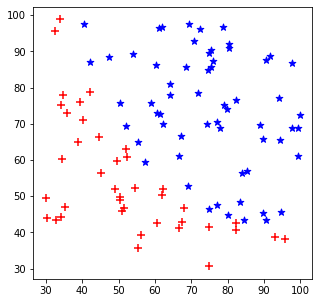

In [21]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(positive['Exam1'],positive['Exam2'],s=50,c='b',marker='*',label='Admis')
ax.scatter(negative['Exam1'],negative['Exam2'],s=50,c='r',marker='+',label='non-Admis')

In [94]:
cols=data.shape[1]
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

X=np.c_[np.ones((X.shape[0],1)),X]


In [96]:
def sigmoid(z):
    return 1/(1+np.exp(-z))




In [107]:
#theta=np.zeros(3)

In [112]:
def cost(theta,X,y):
    m=x.shape[0]
    theta=np.matrix(theta)
    X=np.matrix(X)
    y=np.matrix(y)

    first=np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second=np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    return np.sum(first-second)/m


cost(theta,X,y)


0.6931471805599453

In [141]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
  
    grad = np.zeros(parameters)
  
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
          
    return grad

print( 'gradient descent gives the following value :')
print(gradient(theta,X,y))



gradient descent gives the following value :
[ -0.1        -12.00921659 -11.26284221]


In [153]:
import scipy.optimize as opt
result=opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))

theta_value=cost(result[0],X,y)
print('theta=',costafteroptimize)

theta= 0.20349770158947425


In [168]:
def predict(theta,X):
    prob=sigmoid(X*theta.T)
    return [1 if x>=0.5 else 0  for x in prob]

theta_min= np.matrix(result[0])
preditions=predict(theta_min,X)

def accuracy():
    accuracy=0

    for i in range(0,len(preditions)):
        if(preditions[i]==y[i]):
            accuracy+=1
    return accuracy/len(preditions)
print( accuracy())
        
    
        





0.89
